In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


from scipy.stats import chi2_contingency, iqr
import stat

In [2]:
# get the data
data = pd.read_csv('Datasciencefield_salary.csv',index_col=None)

In [3]:
data.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,6352272.0,DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,8674985.0,GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,1591390.0,HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,11935425.0,US,US,L,50


In [4]:
# lets change the remote_working ratio column variable

data['Remote_Working_Ratio'] = data['Remote_Working_Ratio'].map({0:'No remote',50:'Partial remote',100:'Full remote'})


In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
data.shape

(607, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Salary_In_Rupees      607 non-null    float64
 5   Employee_Location     607 non-null    object 
 6   Company_Location      607 non-null    object 
 7   Company_Size          607 non-null    object 
 8   Remote_Working_Ratio  607 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB


In [7]:
data.describe()

,Working_Year,Salary_In_Rupees
count,607.000000,6.070000e+02
mean,2021.405272,8.935485e+06
std,0.692133,5.646034e+06
min,2020.000000,2.274890e+05
25%,2021.000000,4.991076e+06
50%,2022.000000,8.081874e+06
75%,2022.000000,1.193542e+07
max,2022.000000,4.774170e+07


In [8]:
for i in data:
    print(data[i].value_counts())
    print('****************************************')
    

2022    318
2021    217
2020     72
Name: Working_Year, dtype: int64
****************************************
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager  

In [25]:
data.head()

,Working_Year,Designation,Experience,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,6352272.0,DE,DE,L,No remote
1,2020,Machine Learning Scientist,SE,20688070.0,JP,JP,S,No remote
2,2020,Big Data Engineer,SE,8674985.0,GB,GB,M,Partial remote
3,2020,Product Data Analyst,MI,1591390.0,HN,HN,S,No remote
4,2020,Machine Learning Engineer,SE,11935425.0,US,US,L,Partial remote


Text(0.5, 1.0, 'Top 10 Designation by Sum of Salary')

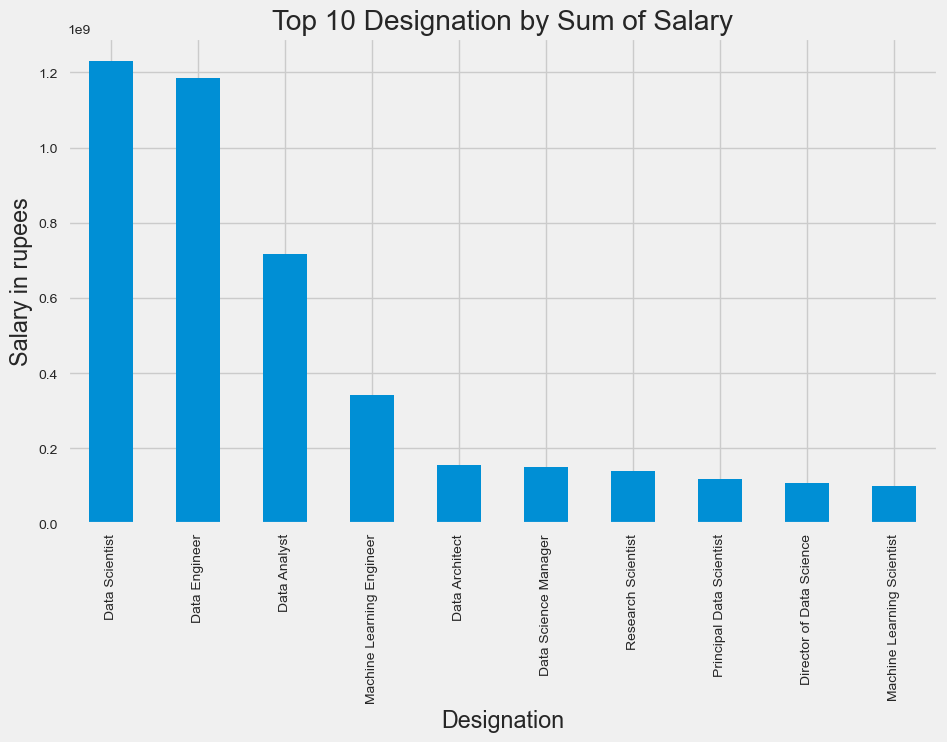

In [42]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
data[['Designation','Salary_In_Rupees']].groupby('Designation')['Salary_In_Rupees'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Salary in rupees')
plt.title('Top 10 Designation by Sum of Salary')

### Categorical variables

In [9]:
# Categorical variables

category = []

for c in data.columns:
    if data[c].dtypes in ['object']:
        category.append(c)
    

In [10]:
category

['Designation',
 'Experience',
 'Employment_Status',
 'Employee_Location',
 'Company_Location',
 'Company_Size',
 'Remote_Working_Ratio']

In [11]:
data.loc[:,category]

,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,Data Scientist,MI,FT,DE,DE,L,No remote
1,Machine Learning Scientist,SE,FT,JP,JP,S,No remote
2,Big Data Engineer,SE,FT,GB,GB,M,Partial remote
3,Product Data Analyst,MI,FT,HN,HN,S,No remote
4,Machine Learning Engineer,SE,FT,US,US,L,Partial remote
...,...,...,...,...,...,...,...
602,Data Engineer,SE,FT,US,US,M,Full remote
603,Data Engineer,SE,FT,US,US,M,Full remote
604,Data Analyst,SE,FT,US,US,M,No remote
605,Data Analyst,SE,FT,US,US,M,Full remote


In [12]:
import colorama
from colorama import Fore

### Statistical Testing using Chisquare

Designation:


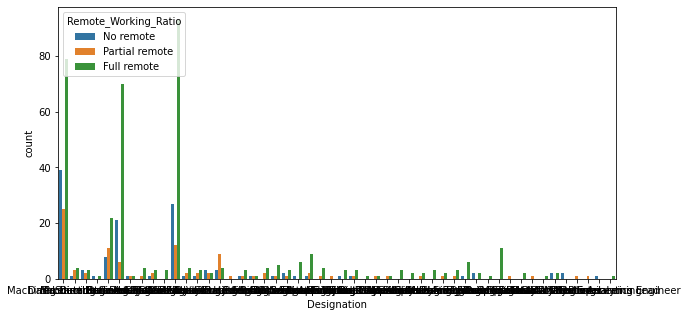

 'Designation' is Good Predictor
p_val=1.2240183607053979e-18

Experience:


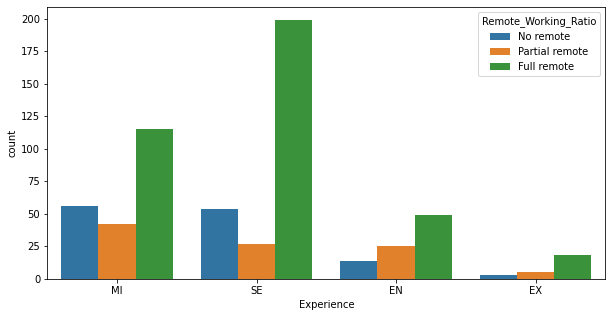

 'Experience' is Good Predictor
p_val=0.000650297186141252

Employment_Status:


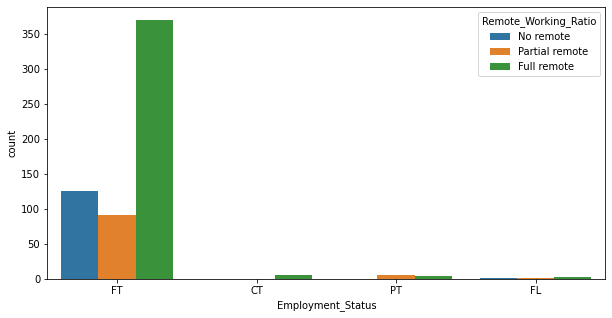

 'Employment_Status' is a bad Predictor
p_val=0.9996733600187045

Employee_Location:


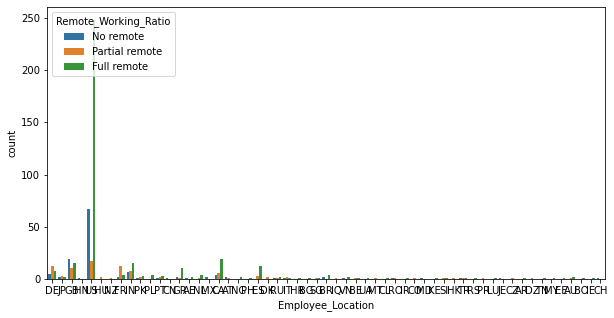

 'Employee_Location' is Good Predictor
p_val=2.8968088657419704e-58

Company_Location:


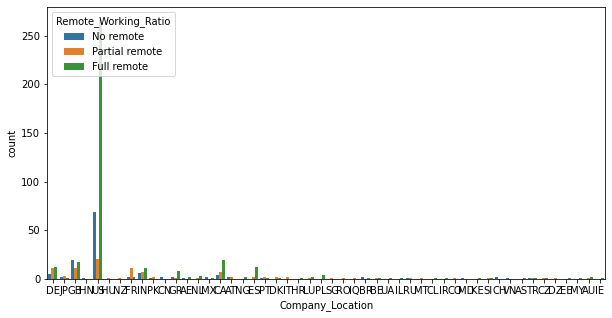

 'Company_Location' is Good Predictor
p_val=2.5759140587858284e-99

Company_Size:


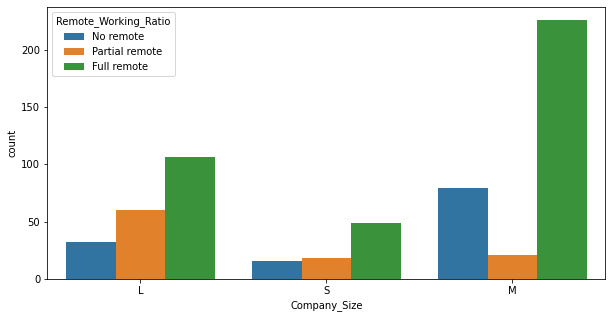

 'Company_Size' is Good Predictor
p_val=0.002365024540455046

Remote_Working_Ratio:


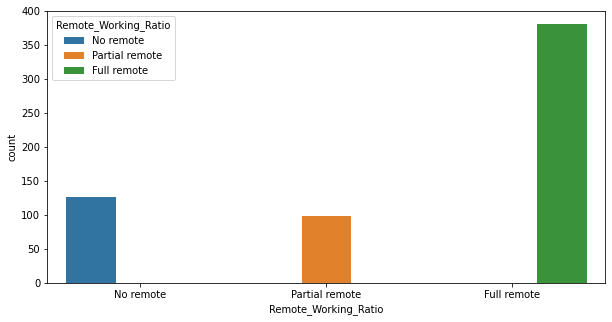

 'Remote_Working_Ratio' is Good Predictor
p_val=0.00011778306142414498



In [13]:
for i in category:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=data, hue='Remote_Working_Ratio')
    plt.show()
    a=np.array(pd.crosstab(data['Salary_In_Rupees'],data[i]))
    (stats,p,dof,_) = chi2_contingency(a,correction=False)
    
    if p>0.05:
        print(Fore.RED + " '{}' is a bad Predictor".format(i))
        print('p_val={}\n'.format(p))
    else:
        print(Fore.GREEN + " '{}' is Good Predictor".format(i))
        print('p_val={}\n'.format(p))

All the columns in category are Good predictor of the salary except Employment status

In [14]:
# drop employment status

data.drop(['Employment_Status'],axis=1, inplace=True)

In [15]:
data.head()

,Working_Year,Designation,Experience,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,6352272.0,DE,DE,L,No remote
1,2020,Machine Learning Scientist,SE,20688070.0,JP,JP,S,No remote
2,2020,Big Data Engineer,SE,8674985.0,GB,GB,M,Partial remote
3,2020,Product Data Analyst,MI,1591390.0,HN,HN,S,No remote
4,2020,Machine Learning Engineer,SE,11935425.0,US,US,L,Partial remote


### Prepare the data for machine learning

In [20]:
df1 = data.copy()

In [21]:
# Convert categorical variables to numbers


def convert_data(df):
    for col in df.columns:
        if df[col].dtypes in ['object']:
            df[col] = df[col].astype('category').cat.codes
    return df

In [22]:
df3 = convert_data(df1)

In [23]:
df3.head()

,Working_Year,Designation,Experience,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,22,2,6352272.0,14,12,0,1
1,2020,41,3,20688070.0,32,29,2,1
2,2020,7,3,8674985.0,20,18,1,2
3,2020,47,2,1591390.0,23,20,2,1
4,2020,38,3,11935425.0,55,48,0,2


### Correlation between variables

<AxesSubplot:>

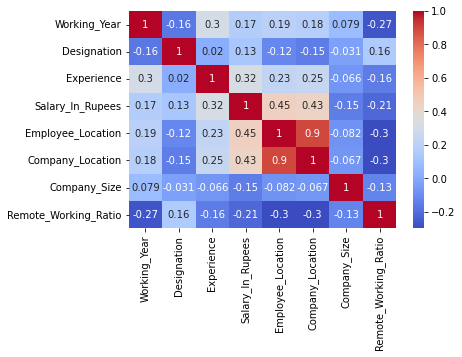

In [24]:
sns.heatmap(df3.corr(),annot=True, cmap='coolwarm')

### Divide the dataset into feature and target sets

In [44]:
# X = feature
# Y = target (remote working ratio)

X = df3.drop(['Salary_In_Rupees'],axis=1)
Y=df3['Salary_In_Rupees']

In [45]:
X.head()

,Working_Year,Designation,Experience,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,22,2,14,12,0,1
1,2020,41,3,32,29,2,1
2,2020,7,3,20,18,1,2
3,2020,47,2,23,20,2,1
4,2020,38,3,55,48,0,2


In [46]:
Y.head()

0     6352272.0
1    20688070.0
2     8674985.0
3     1591390.0
4    11935425.0
Name: Salary_In_Rupees, dtype: float64

### Train Test split

In [47]:
from sklearn.model_selection import train_test_split


In [48]:
# split to train and test set

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

## Build Linear Regression model to predict the salary

In [49]:
from sklearn.linear_model import LinearRegression

In [51]:
# Train the model

linr = LinearRegression()

linr.fit(x_train,y_train)

LinearRegression()

In [52]:
# Test the model

y_pred = linr.predict(x_test)

In [53]:
score = linr.score(x_test,y_test)

In [54]:
print(score*100)

32.08677451755605


The model accuracy is 32%

In [55]:
y_test.head()

563    11159622.0
289    10741883.0
76      7956950.0
78     21483765.0
182     2069205.0
Name: Salary_In_Rupees, dtype: float64

In [58]:
y_pred[:5]

array([11780601.33350587, 11780601.33350587,  9075895.86624789,
       12981444.71289659,  9660101.70885301])

## RandomForest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
# train the model

rf = RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
rf_pred = rf.predict(x_test)

In [63]:
model_score = rf.score(x_test,y_test)

In [68]:
print(model_score*100)

49.83968623727603
